In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import os

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))

Contents: ['simlo', 'sugarcane', 'saptaparni', 'other', 'shirish', 'sonmahor', 'sitafal', 'pipal', 'pilikaren', 'vad', 'gunda', 'kanchan', 'mango', 'motichanoti', 'kesudo', 'gulmohor', 'khajur', 'neem', 'nilgiri', 'jamun', 'banyan', 'babul', 'asopalav', 'cactus', 'bili', 'bamboo', 'garmalo', 'amla', 'coconut', 'champa', '.git']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 31


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 877


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


            Image Count
other               150
sugarcane            50
simlo                50
saptaparni           50
shirish              50
shape:  (31, 1)


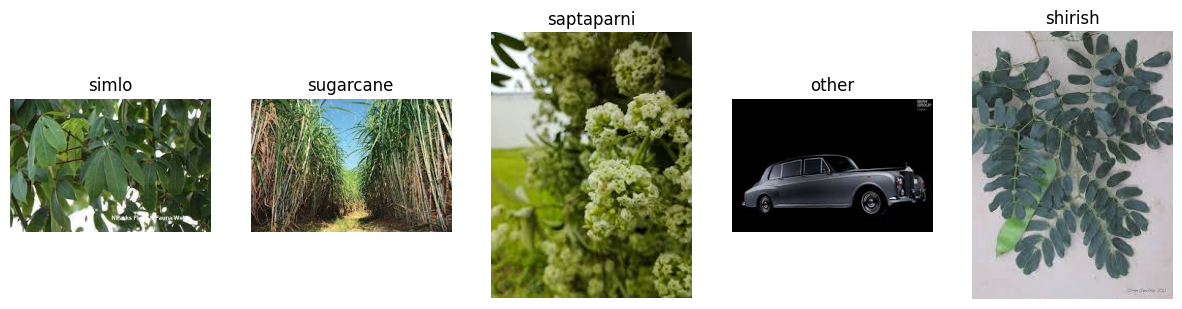

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [ ]:
image_shapes = []

for class_dir in class_dirs:
    class_folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder_path) and not class_dir.startswith('.'): # Check if it's a directory and not a hidden directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'): # Check if it's a file and not a hidden file
                try:
                    img = Image.open(img_path)
                    image_shapes.append(img.size)
                except Exception as e:
                    print(f"Could not open image file {img_path}: {e}")


# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
display(shapes_df.head())

,Width,Height
0,275,183
1,259,194
2,239,211
3,265,190
4,239,211


In [ ]:
print(shapes_df.describe())

             Width       Height
count   875.000000   875.000000
mean    349.028571   298.760000
std     377.363830   354.240389
min     141.000000   130.000000
25%     225.000000   183.000000
50%     259.000000   203.000000
75%     279.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder_path) and not class_dir.startswith('.'): # Check if it's a directory and not a hidden directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'): # Check if it's a file and not a hidden file
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not open image file {img_path}: {e}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 38


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 2


Duplicate set 1:


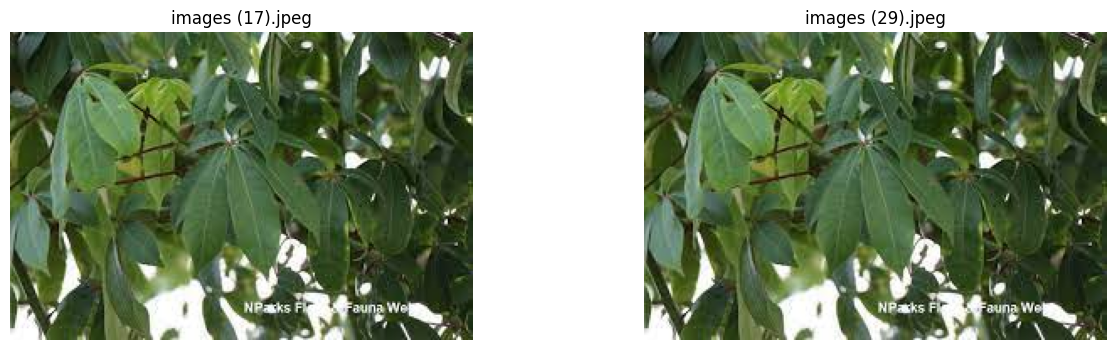

Duplicate set 2:


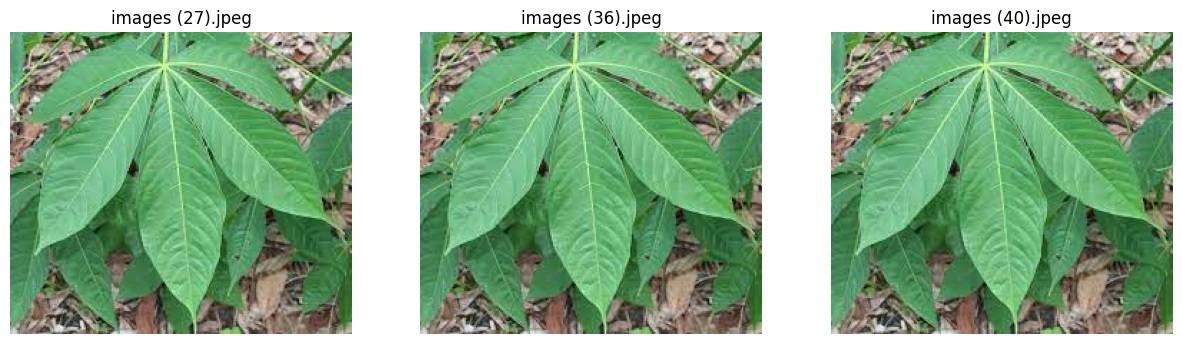

Duplicate set 3:


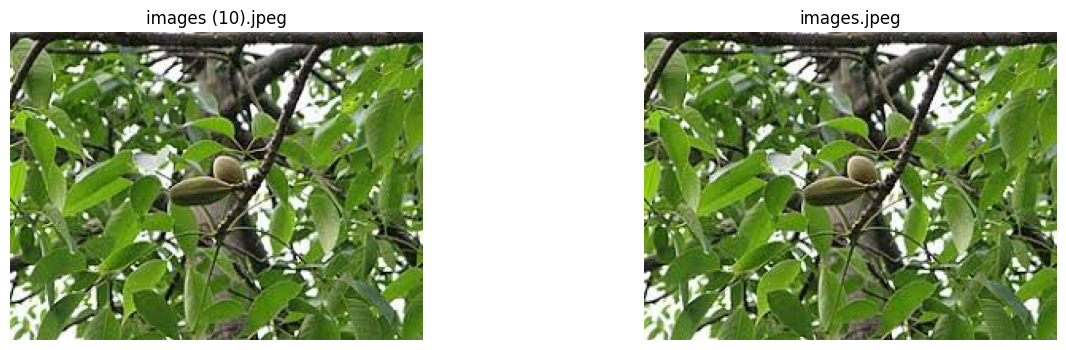

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 40 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder_path) and not class_dir.startswith('.'): # Check if it's a directory and not a hidden directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'): # Check if it's a file and not a hidden file
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not open image file {img_path}: {e}")

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 8
🔺 Very large images: 33


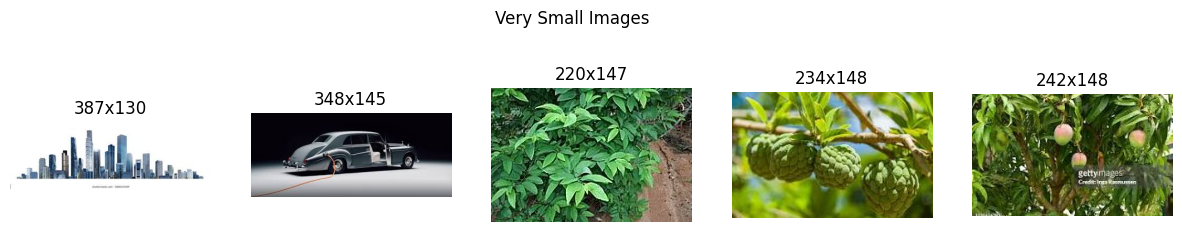

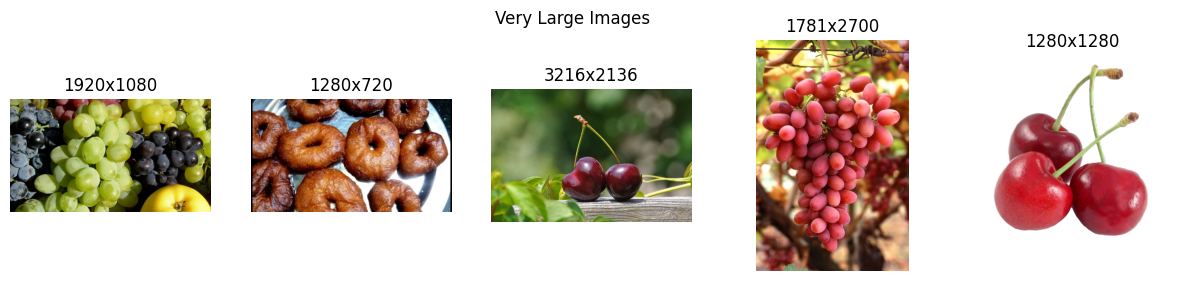

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 41 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count   794.000000   794.000000
mean    288.235516   246.769521
std     131.153525   123.729767
min     151.000000   151.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    1000.000000  1102.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 643 images belonging to 31 classes.
Found 151 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.0706 - loss: 3.2575 - val_accuracy: 0.1656 - val_loss: 2.8270
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.0956 - loss: 2.9517 - val_accuracy: 0.1656 - val_loss: 2.7639
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.1119 - loss: 2.9227 - val_accuracy: 0.1656 - val_loss: 2.7774
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.1267 - loss: 2.8278 - val_accuracy: 0.1656 - val_loss: 2.7470
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.1149 - loss: 2.8956 - val_accuracy: 0.1656 - val_loss: 2.7627
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.1374 - loss: 2.7930 - val_accuracy: 0.1656 - val_loss: 2.7304
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.0934 - loss: 2.8346 - val_accuracy: 0.1656 - val_loss: 2.7293
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.1443 - loss: 2.8181 - val_accuracy: 0.1656 - val_loss:

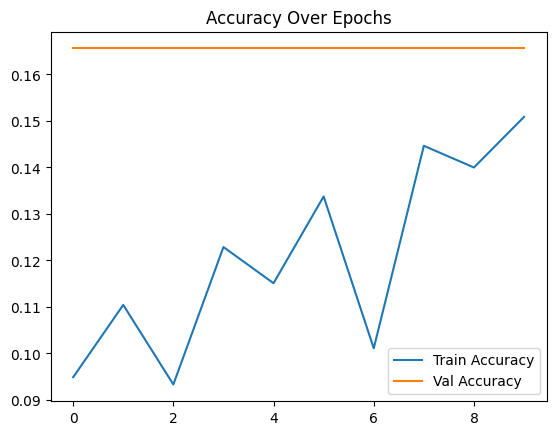

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Define the path to the repository
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 30
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 643 images belonging to 31 classes.
Found 151 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 223s 10s/step - accuracy: 0.0827 - loss: 4.7803 - val_accuracy: 0.1987 - val_loss: 2.5451
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.1842 - loss: 2.7312 - val_accuracy: 0.2384 - val_loss: 2.3995
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.2291 - loss: 2.5231 - val_accuracy: 0.2980 - val_loss: 2.2342
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.2335 - loss: 2.4325 - val_accuracy: 0.2583 - val_loss: 2.1890
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.2577 - loss: 2.2846 - val_accuracy: 0.3113 - val_loss: 2.1814
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.2690 - loss: 2.2170 - val_accuracy: 0.3245 - val_loss: 2.0341
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.2944 - loss: 2.1996 - val_accuracy: 0.3642 - val_loss: 2.0268
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.3171 - loss: 2.0719 - val_accuracy: 0.3841 - va

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


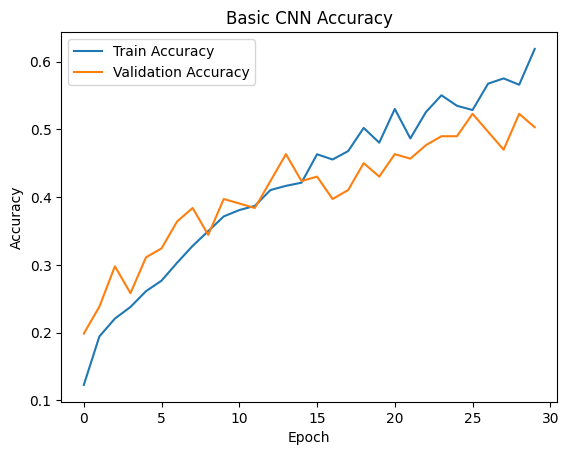

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Define the path to the repository
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Get the number of classes from the generator
num_classes = train_generator.num_classes


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=80)

model.save("improved_cnn_model.h5")

Found 643 images belonging to 31 classes.
Found 151 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.1377 - loss: 5.4359 - val_accuracy: 0.0265 - val_loss: 3.9049
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.2396 - loss: 2.8265 - val_accuracy: 0.0000e+00 - val_loss: 8.2366
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.2562 - loss: 2.7594 - val_accuracy: 0.0000e+00 - val_loss: 12.5032
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.2465 - loss: 2.7315 - val_accuracy: 0.0000e+00 - val_loss: 14.9018
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.3259 - loss: 2.5360 - val_accuracy: 0.0000e+00 - val_loss: 15.5490
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.3381 - loss: 2.4101 - val_accuracy: 0.0000e+00 - val_loss: 18.3318
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.3052 - loss: 2.4042 - val_accuracy: 0.0000e+00 - val_loss: 17.3345
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.2988 - loss: 2.30

In [3]:
model.save('/content/drive/MyDrive/improved_cnn_model.h5')

In [4]:
!ls /content/drive/MyDrive/

'20221213_233542 (1).jpg'   DriveLinks
 20221213_233542.jpg	    GDToT
 20250102_174325.jpg	    improved_cnn_model.h5
 20250102_174403.jpg	   'index (1).gdoc'
'20250102_174455 (1).jpg'  'index (2).gdoc'
 20250102_174455.jpg	   'index (3).gdoc'
'20250102_174918 (1).jpg'   index.gdoc
'20250102_174918 (2).jpg'   index.pdf
 20250102_174918.jpg	    InShot_20250121_120256757.jpg
'archive (2).zip'	    Screenshot_20240924-133408_Chrome.jpg
'Colab Notebooks'	    Tree_Species_Dataset


In [5]:
from tensorflow.keras.models import load_model

model = load_model('improved_cnn_model.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,253,537 (84.89 MB)

 Trainable params: 22,253,087 (84.89 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)